In [56]:
!pip install nlp_utils


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [18]:
path = '../data/chat/chat45-55.txt'
f = open(path, "r", encoding="utf-8")
print(f.read())
# reading the data 

Hello! How's your day going? =Hi there! It's going alright?
It's going alright,= Great to hear! I'm here to chat and listen if you ever want to share anything. Is there anything on your mind today?
I've been feeling a bit frustrated about a few things lately. =I'm here to listen. What's been on your mind?
I feel like there's a lack of respect in the workplace sometimes.= I understand how important respect is. Could you tell me more about what's been happening?
interrupted during meetings or not being consulted on decisions that affect my work. =That does sound frustrating. Feeling respected at work is crucial. Have you had a chance to address these concerns with anyone?
I've been hesitant to bring it up. =I hear you. It's important to feel comfortable addressing these issues. Is there anything specific you'd like to see change in terms of respect in the workplace?
communication and consideration for everyone's input would be great.= I agree. Open communication is key to fostering respe

In [19]:
df=pd.read_csv(path,names=('Query','Response'),sep=('='))
df
# Reading the datadf

,Query,Response
0,Hello! How's your day going?,Hi there! It's going alright?
1,"It's going alright,",Great to hear! I'm here to chat and listen if...
2,I've been feeling a bit frustrated about a few...,I'm here to listen. What's been on your mind?
3,I feel like there's a lack of respect in the w...,I understand how important respect is. Could ...
4,interrupted during meetings or not being consu...,That does sound frustrating. Feeling respected...
5,I've been hesitant to bring it up.,I hear you. It's important to feel comfortable...
6,communication and consideration for everyone's...,I agree. Open communication is key to fosteri...
7,"uncertain, to be honest. The fluctuations in t...",Understandable. Economic uncertainty can be s...
8,concerns about job stability and retirement sa...,I can imagine how that would weigh on your min...
9,It's been on my to-do list for a while.,It's never too late to revisit your financial ...


In [13]:

# loading the data

## Data Understanding

In [14]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(53, 2)

In [20]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [21]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     43 non-null     object
 1   Response  32 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


In [22]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,43,32
unique,43,32
top,Hey,Hi! How are you doing?😍 I'm here to chat and l...
freq,1,1


In [23]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       43
Response    32
dtype: int64

In [24]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query        0
Response    11
dtype: int64

In [25]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
Hey                                                                                                                                                                                                                                                                                                           1
It's just little things, like being interrupted during meetings or not being consulted on decisions that affect my work.                                                                                                                                                                                      1
It's alright, but I could definitely use some guidance on managing expenses and saving more effectively.                                                                                                                                                                                                      1
Just the usual stuff I am trying to save up for the future while still enjoying li

In [26]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

Response
Hi! How are you doing?😍 I'm here to chat and listen if you'd like to share anything about your job or anything else on your mind.                                                                          1
That's good to hear! How do you feel about your current job? Are you pretty satisfied with what you're doing?                                                                                              1
That's wonderful to hear. Feeling empowered to make choices that align with your values is important for overall well-being. Is there anything specific you feel could enhance your sense of freedom?      1
It's never too late to revisit your financial plans and make any necessary adjustments. Moving on, how's your overall health been lately?                                                                  1
Understandable. Economic uncertainty can be stressful. Have you noticed any effects of the economy on your personal or professional life                                   

## Data Visualization

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
Text=df['Query']

In [29]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Hey 
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Hi! Thanks for reaching out. Everything's been okay lately, I guess.
neg: 0.0, neu: 0.504, pos: 0.496, compound: 0.7088, 
Yeah, it's alright. I mean, I like the work, but sometimes the hours can be long.
neg: 0.0, neu: 0.694, pos: 0.306, compound: 0.431, 
I've been thinking about it more lately, especially with trying to pursue my interests outside of work.
neg: 0.0, neu: 0.889, pos: 0.111, compound: 0.25, 
Well, I've been hoping to advance in my career and maybe even switch fields eventually. Also, I'd love to travel more and explore different cultures.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.8442, 
I've been trying to learn new skills and networking whenever I can. But sometimes, it feels like I'm stuck in a rut.
neg: 0.105, neu: 0.758, pos: 0.137, compound: 0.1901, 
Honestly, it could be better. I feel like I'm putting in a lot of effort, but the compensation doesn't always match up. It's important to feel valued for the work 

In [30]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [31]:
df

,Query,Response,neg,neu,pos,compound
0,Hey,Hi! How are you doing?😍 I'm here to chat and l...,0.000,1.000,0.000,0.0000
1,Hi! Thanks for reaching out. Everything's been...,That's good to hear! How do you feel about you...,0.000,0.504,0.496,0.7088
2,"Yeah, it's alright. I mean, I like the work, b...",I see. Long hours can definitely take a toll. ...,0.000,0.694,0.306,0.4310
3,"I've been thinking about it more lately, espec...",It's important to have time for yourself and y...,0.000,0.889,0.111,0.2500
4,"Well, I've been hoping to advance in my career...",Those sound like fantastic goals! What steps d...,0.000,0.707,0.293,0.8442
5,I've been trying to learn new skills and netwo...,I get that. It can be challenging to navigate ...,0.105,0.758,0.137,0.1901
6,"Honestly, it could be better. I feel like I'm ...",NaN,0.000,0.716,0.284,0.9052
7,"Not yet, but I've been thinking about it. It's...",I understand. It can be daunting to have those...,0.103,0.897,0.000,-0.1531
8,"Well, money's always on my mind, especially wi...",NaN,0.029,0.748,0.223,0.9127
9,"Yeah, I've been doing some research, but it's ...",Definitely. It's important to weigh your optio...,0.000,0.862,0.138,0.1531


In [32]:
from wordcloud import WordCloud
# importing word cloud

In [33]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

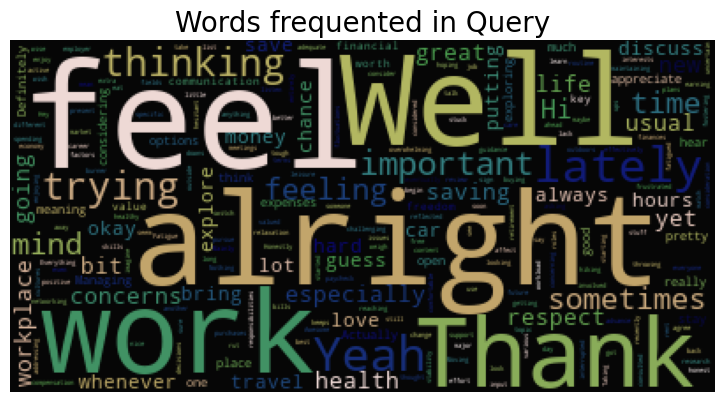

In [34]:
wordcloud(df,'Query')
# top words in the query column

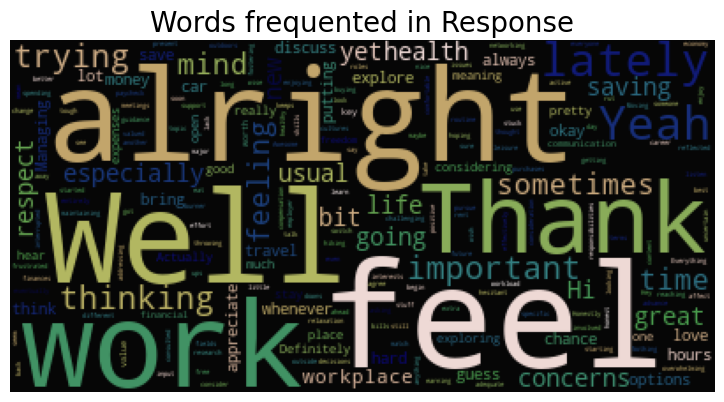

In [35]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [ ]:
# Removing special characters

In [36]:
import re
# importing regular expressions

In [37]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [38]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [39]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [40]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [41]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [42]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

TypeError: expected string or bytes-like object

In [43]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,hey,Hi! How are you doing?😍 I'm here to chat and l...,0.000,1.000,0.000,0.0000
1,hi thanks for reaching out everything s been...,That's good to hear! How do you feel about you...,0.000,0.504,0.496,0.7088
2,yeah it s alright i mean i like the work b...,I see. Long hours can definitely take a toll. ...,0.000,0.694,0.306,0.4310
3,i ve been thinking about it more lately espec...,It's important to have time for yourself and y...,0.000,0.889,0.111,0.2500
4,well i ve been hoping to advance in my career...,Those sound like fantastic goals! What steps d...,0.000,0.707,0.293,0.8442
5,i ve been trying to learn new skills and netwo...,I get that. It can be challenging to navigate ...,0.105,0.758,0.137,0.1901
6,honestly it could be better i feel like i m ...,NaN,0.000,0.716,0.284,0.9052
7,not yet but i ve been thinking about it it s...,I understand. It can be daunting to have those...,0.103,0.897,0.000,-0.1531
8,well money s always on my mind especially wi...,NaN,0.029,0.748,0.223,0.9127
9,yeah i ve been doing some research but it s ...,Definitely. It's important to weigh your optio...,0.000,0.862,0.138,0.1531


In [ ]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [ ]:
df

### Important Sentence

In [ ]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [ ]:
imp_sent.head(5)
# printing the first 5 rows

### Top Positive Sentence

In [ ]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [ ]:
pos_sent.head(5)
# printing the first 5 rows

### Top Negative Sentence

In [ ]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [ ]:
neg_sent.head(5)
# printing the first 5 rows

### Top Neutral Sentence

In [ ]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [ ]:
neu_sent.head(5)
# printing the first 5 rows

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [45]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [46]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [ ]:
# tfidf.get_feature_names()
# displaying feature names

# Application

In [47]:
from sklearn.metrics.pairwise import cosine_distances
from nltk.stem import WordNetLemmatizer
import nltk

# Download the WordNet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
lemmatizer = WordNetLemmatizer()

query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemmatizer.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [51]:
#Sample
query = "'Yeah, it's alright. I mean, I like the work'"
response = chatbot(query)
print(response)

{'match': 'yeah  it s alright  i mean  i like the work  but sometimes the hours can be long ', 'response': 'I see. Long hours can definitely take a toll. Is work-life balance something you think about often?', 'score': 0.7159244916020986, 'pos': 0.306, 'neg': 0.0, 'neu': 0.694}


**Run the below code in order to have the chatbot app, you should interact with that by running this code:**


**Enjoy!**